<a href="https://colab.research.google.com/github/amzad-786githumb/Data_Analytics-R/blob/main/Linear_Regression_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>LAB-1:Introduction to linear regression</h1>

<h2>Load packages</h2>

In [2]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("statsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘MatrixModels’, ‘hypergeo’, ‘RcppEigen’, ‘BayesFactor’, ‘gridExtra’, ‘cubature’




In [5]:
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(statsr)
library(dplyr)
library(ggplot2)
library(broom)

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.7. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<h2>Load The data</h2>

In [7]:
data(mlb11)

In [8]:
#Printing the first few rows
head(mlb11)

team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725


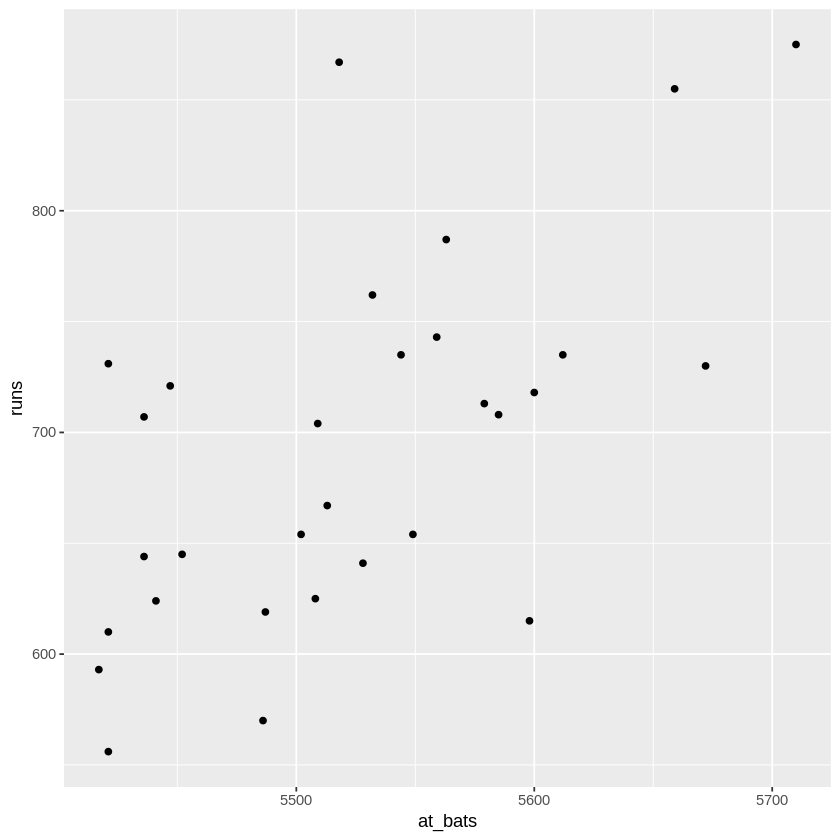

In [9]:
# Code for plotting
ggplot(data= mlb11, aes(x=at_bats, y=runs)) +
  geom_point()

<h4>Q1.) If you knew a team’s at_bats, would you be comfortable using a linear model to predict their number of runs?

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.</h4>

In [10]:
corr_coeff <- mlb11 %>%
  summarise(cor(runs, at_bats))
corr_coeff

"cor(runs, at_bats)"
<dbl>
0.610627


<h2>1. Linearity:</h2>

In [11]:
lm_fit <- lm(runs ~ at_bats, data = mlb11)
summary(lm_fit)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


`geom_smooth()` using formula = 'y ~ x'


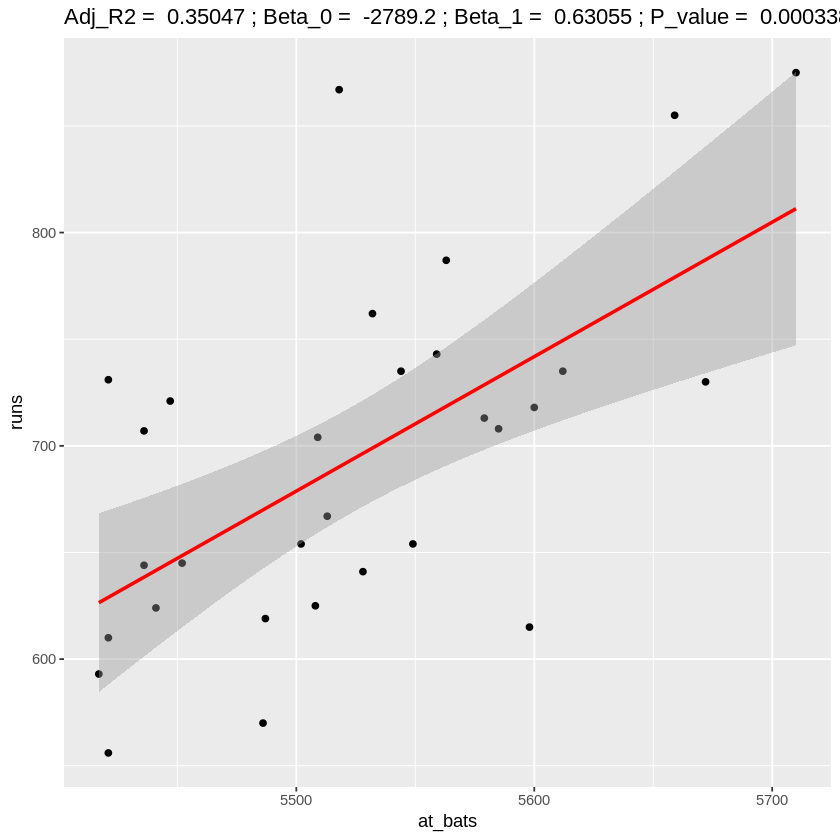

In [12]:
# plotting the linear line between the two variables

ggplot(data= mlb11, aes(x=at_bats, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(lm_fit)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(lm_fit$coef[[1]], 5),
                     "; Beta_1 = ", signif(lm_fit$coef[[2]], 5),
                     "; P_value = ", signif(summary(lm_fit)$coef[2,4], 5)))

<h2>2. Nearly Normal Residuals:</h2>

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Warning message:
“Use of `resid_df$.resid` is discouraged.
ℹ Use `.resid` instead.”


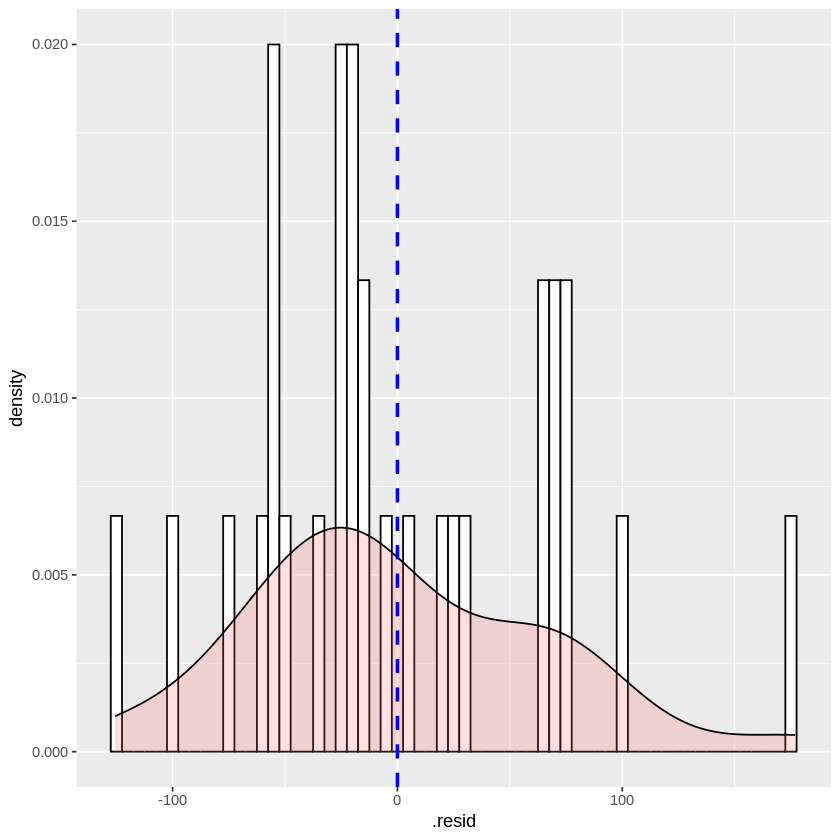

In [13]:
resid_df <- augment(lm_fit)

ggplot(resid_df, aes(x = .resid)) +
  geom_histogram(aes(y=..density..), color="black", fill="white", binwidth = 5) +
  geom_density(alpha=.2, fill="#FF6666") +
  geom_vline(aes(xintercept=mean(resid_df$.resid)),
            color="blue", linetype="dashed", size=1)

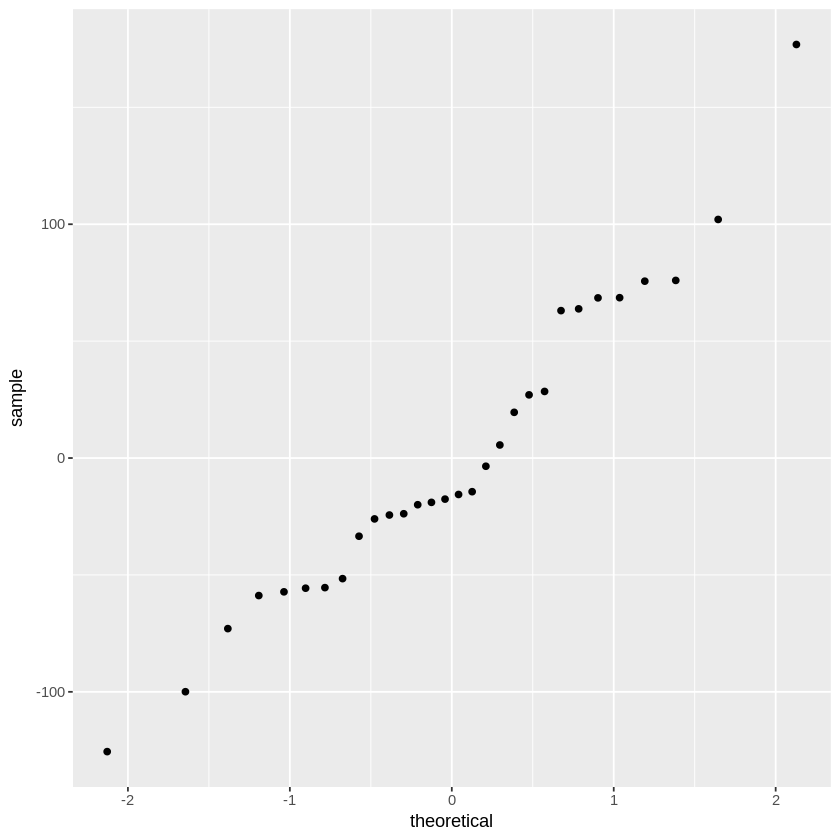

In [14]:
#The residuals are fairly symmetric, with only a slightly longer tail on the right,
#hence it would be appropriate to deem the the normal distribution of residuals condition met.

ggplot(data = resid_df, aes(sample = .resid)) +
  stat_qq()

<h2>3. Constant Variability</h2>

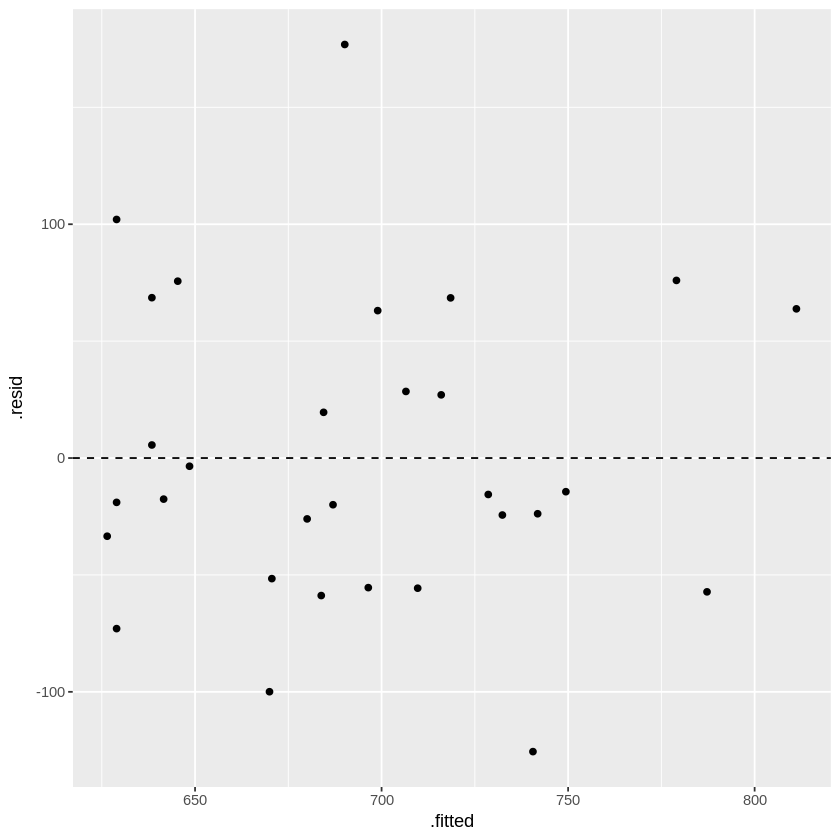

In [15]:
ggplot(resid_df, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed")

<h1>Sum of squared residuals</h1>

<p>In this section you will use an interactive function to investigate what we mean by “sum of squared residuals”. You will need to run this function in your console, not in your markdown document. Running the function also requires that the mlb11 dataset is loaded in your environment.</p>

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

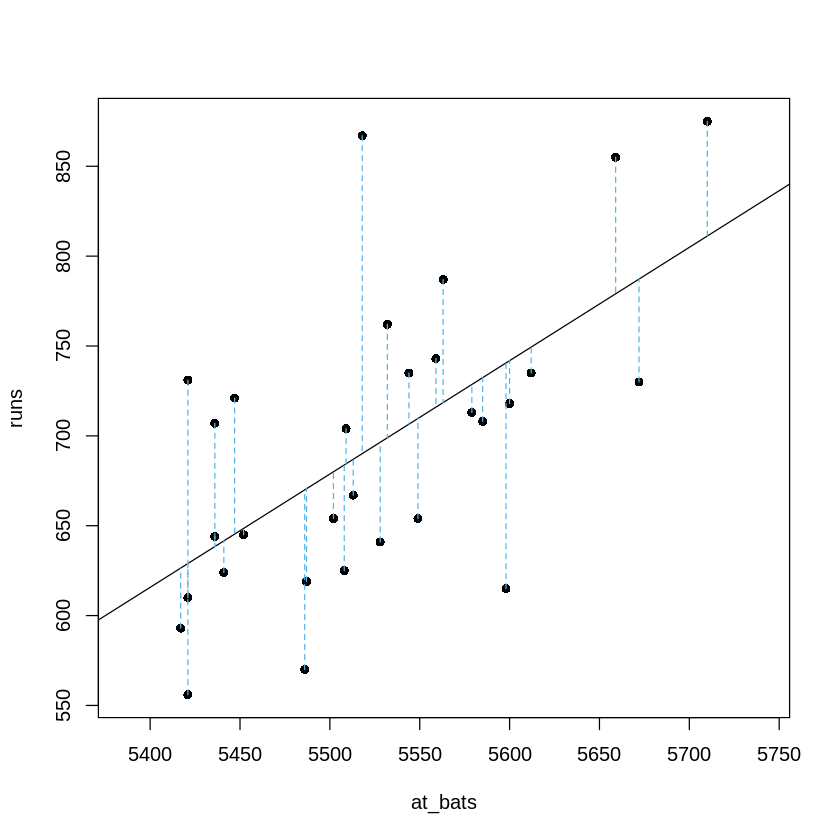

In [16]:
plot_ss(x = at_bats, y = runs, data = mlb11)

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

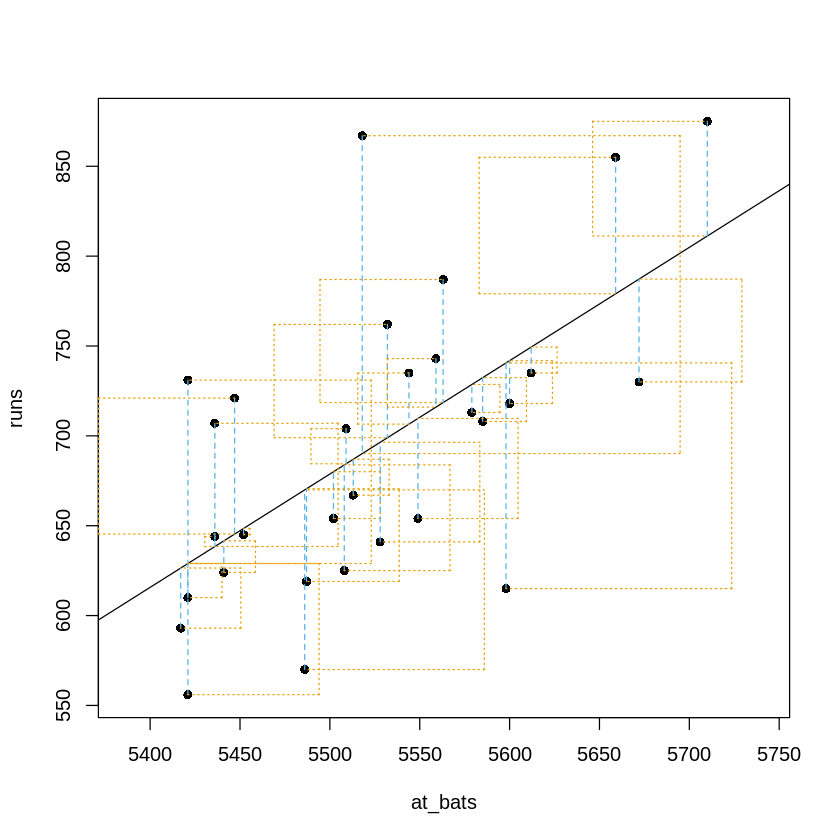

In [17]:
#The most common way to do linear regression is to select the line that minimizes the sum of squared residuals.

plot_ss(x = at_bats, y = runs, data = mlb11, showSquares = TRUE)

<h4>Q2.)Using plot_ss, choose a line that does a good job of minimizing the sum of squares. Run the function several times. Report your smallest sum of squares.

Best Sum of Squares: 123721.9</h4>

<h1>The linear model</h1>


In [18]:
m1 <- lm(runs ~ at_bats, data = mlb11)

In [19]:
summary(m1)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


<h4>Q3. )Fit a new model that uses homeruns to predict runs. Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?</h4>

In [20]:
m2 <- lm(runs ~ homeruns, data = mlb11)
summary(m2)


Call:
lm(formula = runs ~ homeruns, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.615 -33.410   3.231  24.292 104.631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415.2389    41.6779   9.963 1.04e-10 ***
homeruns      1.8345     0.2677   6.854 1.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.29 on 28 degrees of freedom
Multiple R-squared:  0.6266,	Adjusted R-squared:  0.6132 
F-statistic: 46.98 on 1 and 28 DF,  p-value: 1.9e-07


<h1>Prediction and prediction errors</h1>

`geom_smooth()` using formula = 'y ~ x'


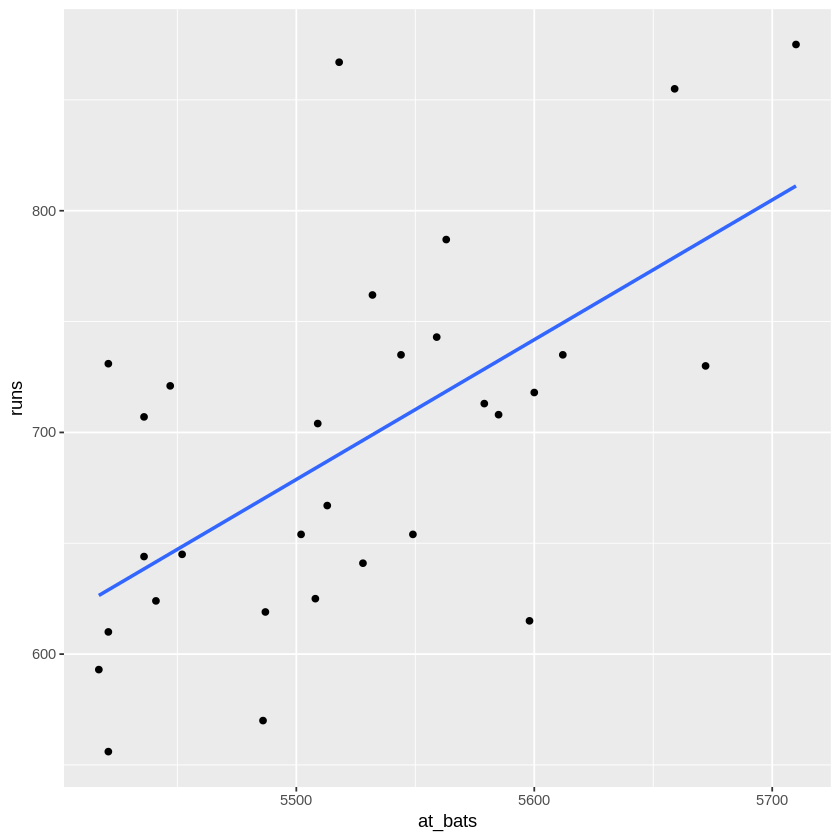

In [21]:
#Let’s create a scatterplot with the least squares line for m1 laid on top

ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

<h4>Q4. )If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,579 at-bats? Is this an overestimate or an underestimate, and by how much?</h4>

In [22]:
#To find the observed number of runs for the team with 5,579 at bats you can use the following:

y_actual <- mlb11 %>%
  filter(at_bats == 5579) %>%
  select(runs)
y_actual

runs
<int>
713


In [23]:
713 - predict(m1, data.frame(at_bats = 5579))

1 
-15.59552

<h1>Model diagnostics</h1>

<p>To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.</p>

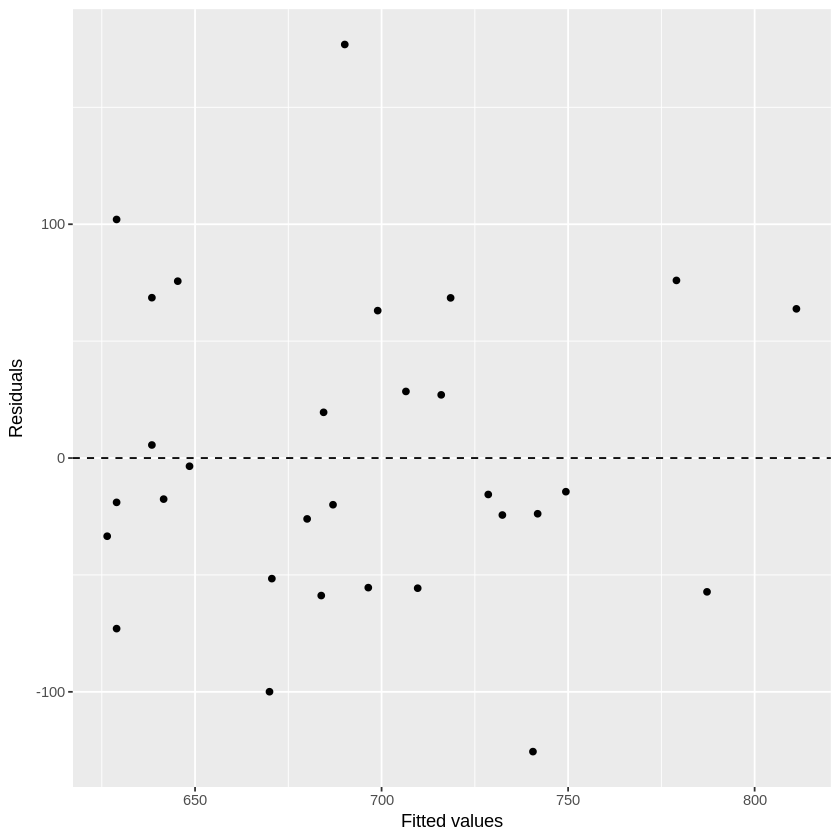

In [24]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

<h4>Q5.) If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,579 at-bats? Is this an overestimate or an underestimate, and by how much?</h4>

In [31]:
y_actual <- mlb11 %>%
  filter(at_bats == 5579) %>%
  select(runs)
y_actual

runs
<int>
713


In [29]:

713 - predict(m1, data.frame(at_bats = 5579))

1 
-15.59552

<h1>Model diagnostics</h1>

<p>Linearity: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. fitted (predicted) values.</p>

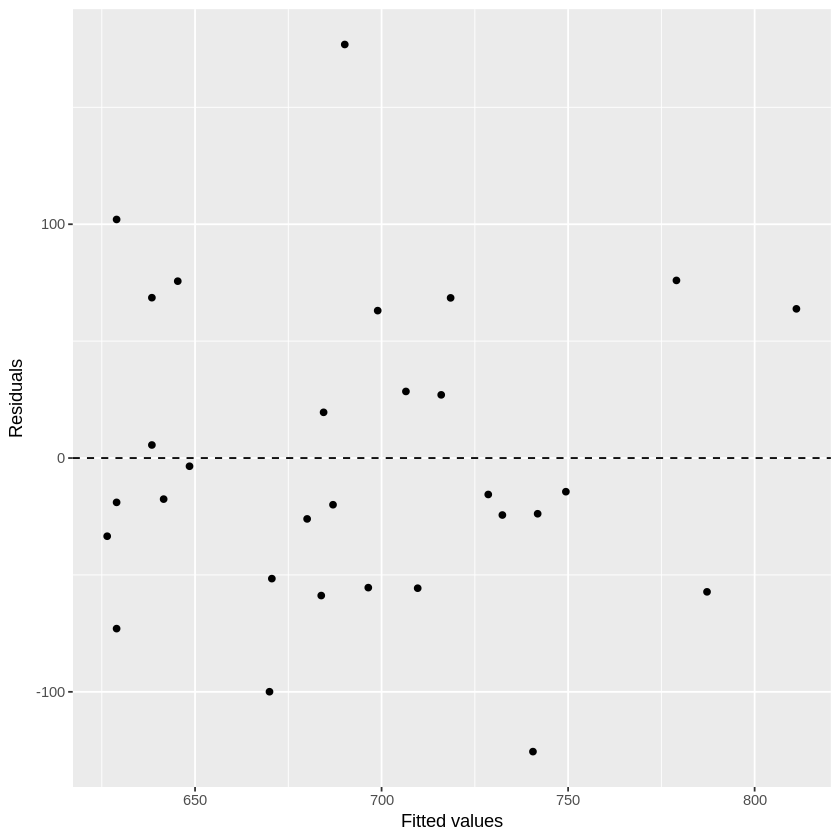

In [32]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

<h4>Q6 .)Choose another one of the seven traditional variables from mlb11 besides at_bats that you think might be a good predictor of runs. Produce a scatterplot of the two variables and fit a linear model. At a at h<t</h4>

`geom_smooth()` using formula = 'y ~ x'


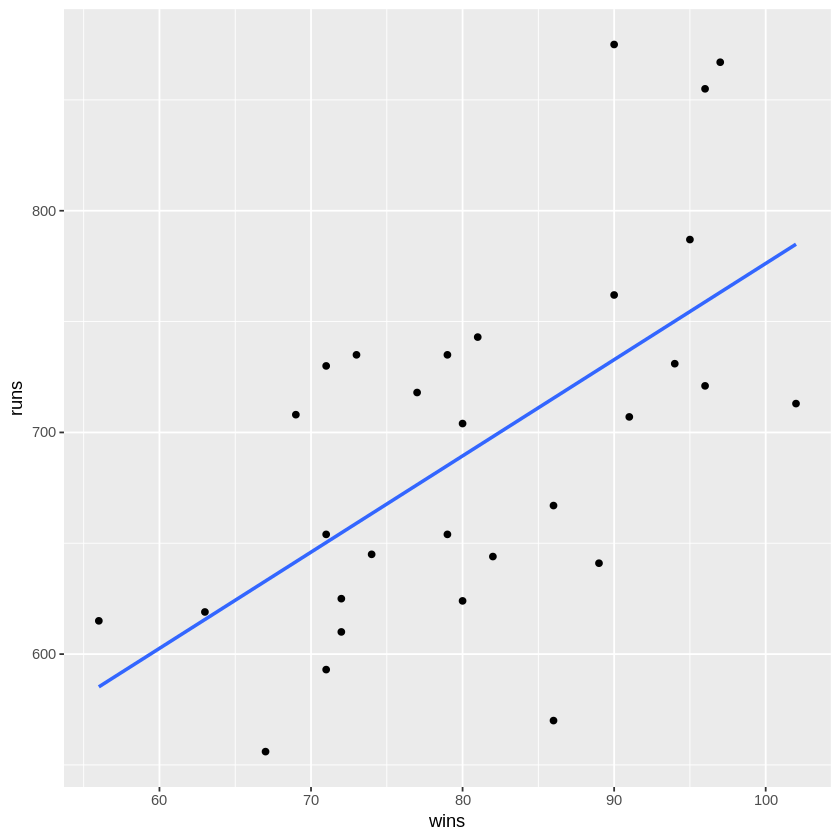

In [33]:
ggplot(data = mlb11, aes(x = wins, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

In [34]:
m3 <- lm('runs ~ wins',data = mlb11)
summary(m3)


Call:
lm(formula = "runs ~ wins", data = mlb11)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.450  -47.506   -7.482   47.346  142.186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  342.121     89.223   3.834 0.000654 ***
wins           4.341      1.092   3.977 0.000447 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.1 on 28 degrees of freedom
Multiple R-squared:  0.361,	Adjusted R-squared:  0.3381 
F-statistic: 15.82 on 1 and 28 DF,  p-value: 0.0004469


<h4>Q7 .)How does this relationship compare to the relationship between runs and at_bats? Use the R2
 values from the two model summaries to compare. Does your variable seem to predict runs better than at_bats? How can you tell?</h4>

In [36]:
summary(m3)$adj.r.squaredv

NULL

`geom_smooth()` using formula = 'y ~ x'


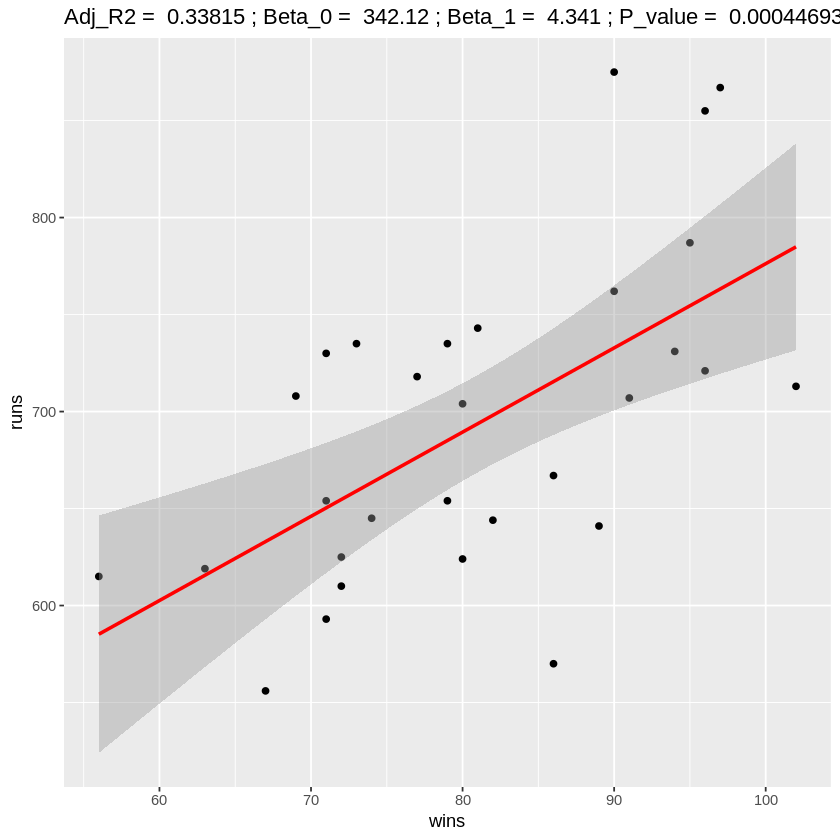

In [37]:
ggplot(data= mlb11, aes(x=wins, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m3)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m3$coef[[1]], 5),
                     "; Beta_1 = ", signif(m3$coef[[2]], 5),
                     "; P_value = ", signif(summary(m3)$coef[2,4], 5)))

`geom_smooth()` using formula = 'y ~ x'


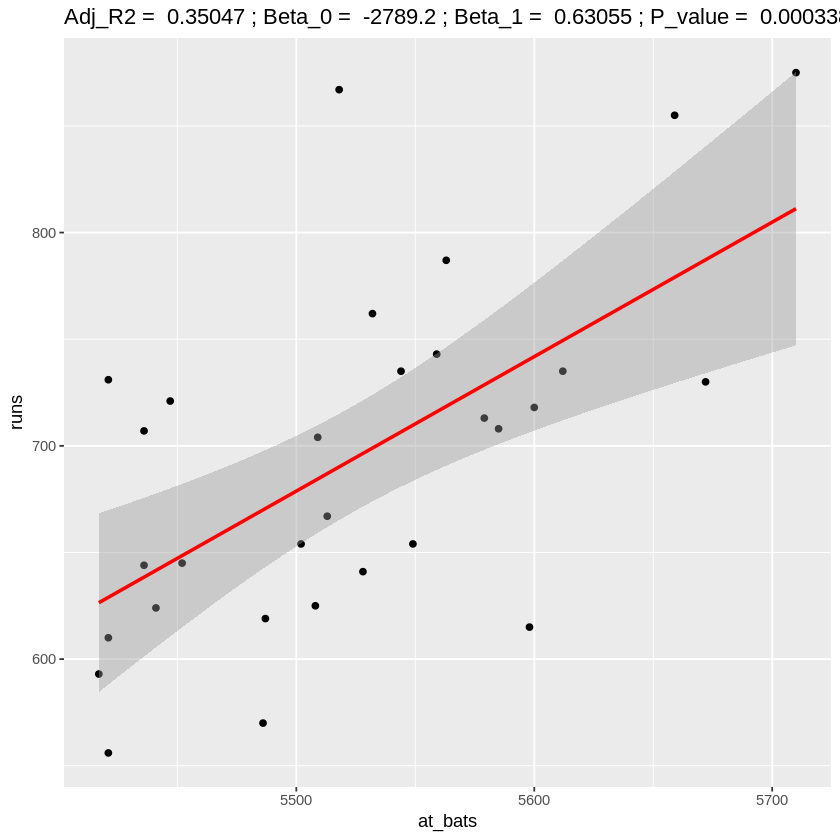

In [38]:
m4 <- lm('runs ~ at_bats',data = mlb11)
ggplot(data= mlb11, aes(x=at_bats, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m4)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m4$coef[[1]], 5),
                     "; Beta_1 = ", signif(m4$coef[[2]], 5),
                     "; P_value = ", signif(summary(m4)$coef[2,4], 5)))

`geom_smooth()` using formula = 'y ~ x'


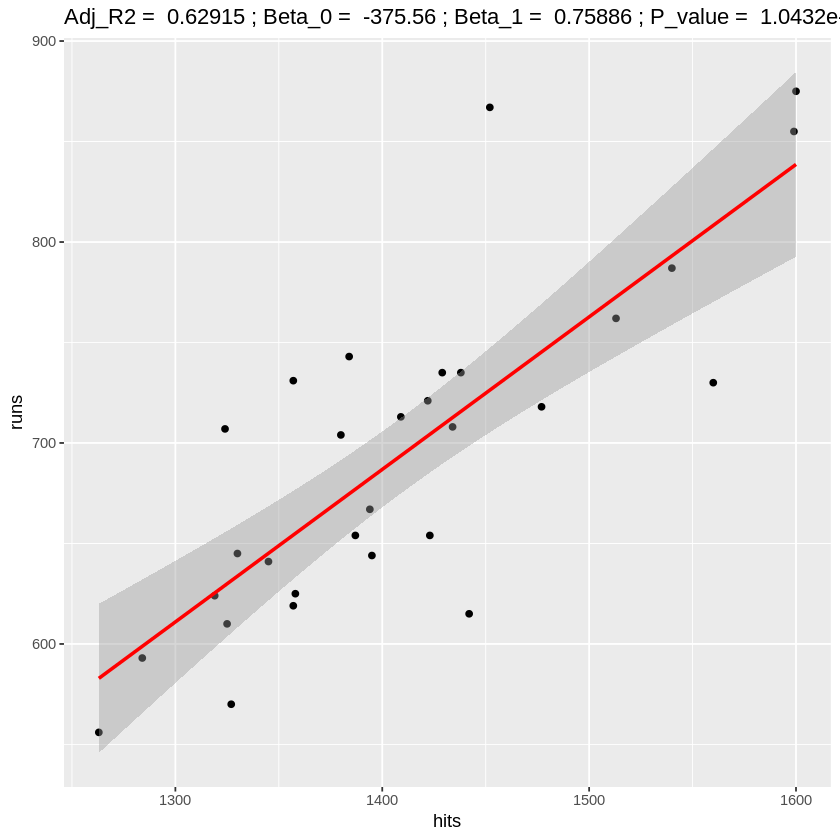

In [39]:
m5 <- lm('runs ~ hits',data = mlb11)
ggplot(data= mlb11, aes(x=hits, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m5)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m5$coef[[1]], 5),
                     "; Beta_1 = ", signif(m5$coef[[2]], 5),
                     "; P_value = ", signif(summary(m5)$coef[2,4], 5)))

`geom_smooth()` using formula = 'y ~ x'


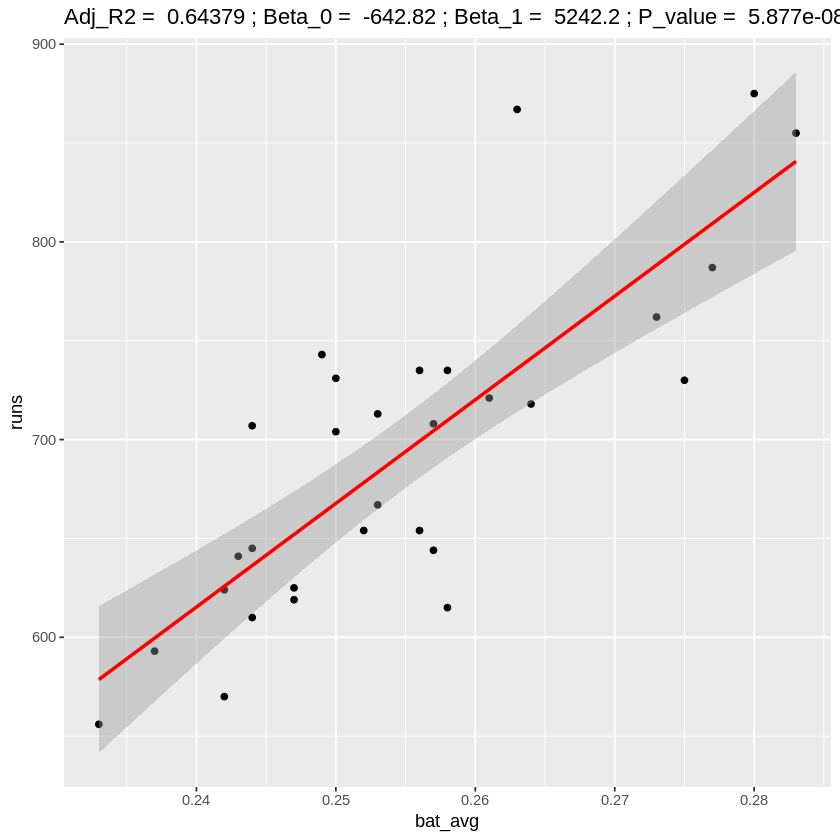

In [40]:
m6 <- lm('runs ~ bat_avg',data = mlb11)
ggplot(data= mlb11, aes(x=bat_avg, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m6)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m6$coef[[1]], 5),
                     "; Beta_1 = ", signif(m6$coef[[2]], 5),
                     "; P_value = ", signif(summary(m6)$coef[2,4], 5)))

`geom_smooth()` using formula = 'y ~ x'


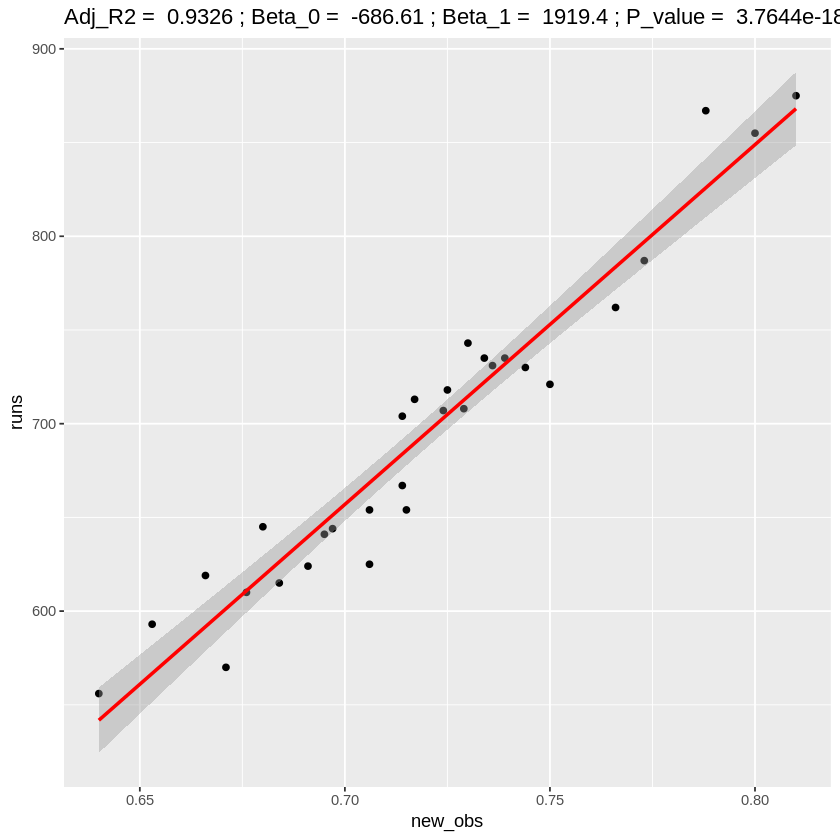

In [41]:
m7 <- lm('runs ~ new_obs',data = mlb11)
ggplot(data= mlb11, aes(x=new_obs, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m7)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m7$coef[[1]], 5),
                     "; Beta_1 = ", signif(m7$coef[[2]], 5),
                     "; P_value = ", signif(summary(m7)$coef[2,4], 5)))

`geom_smooth()` using formula = 'y ~ x'


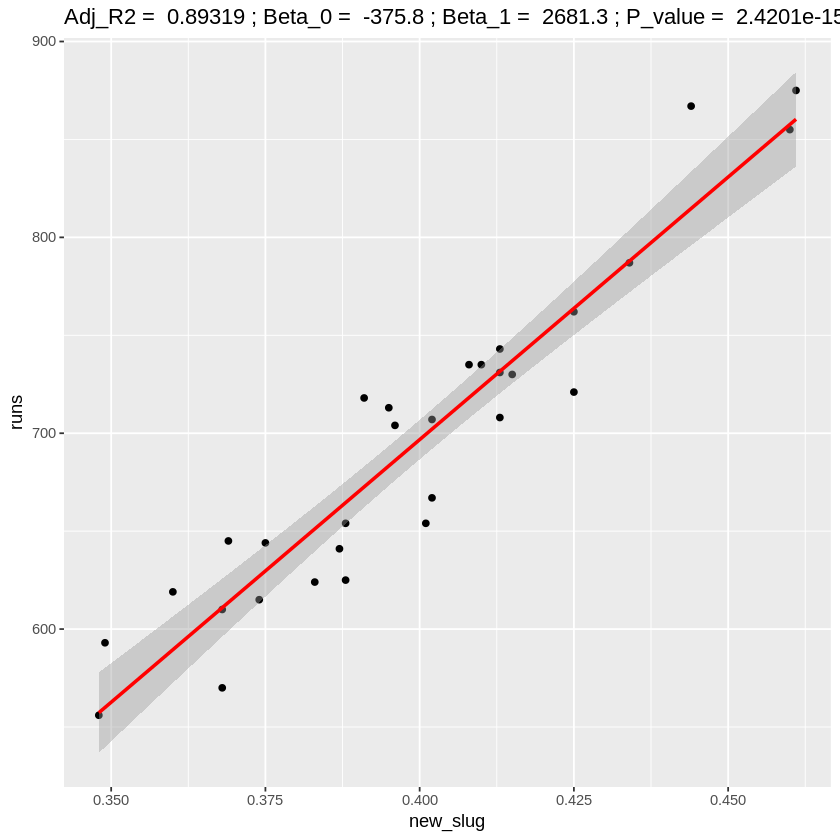

In [42]:
m8 <- lm('runs ~ new_slug',data = mlb11)
ggplot(data= mlb11, aes(x=new_slug, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m8)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m8$coef[[1]], 5),
                     "; Beta_1 = ", signif(m8$coef[[2]], 5),
                     "; P_value = ", signif(summary(m8)$coef[2,4], 5)))

`geom_smooth()` using formula = 'y ~ x'


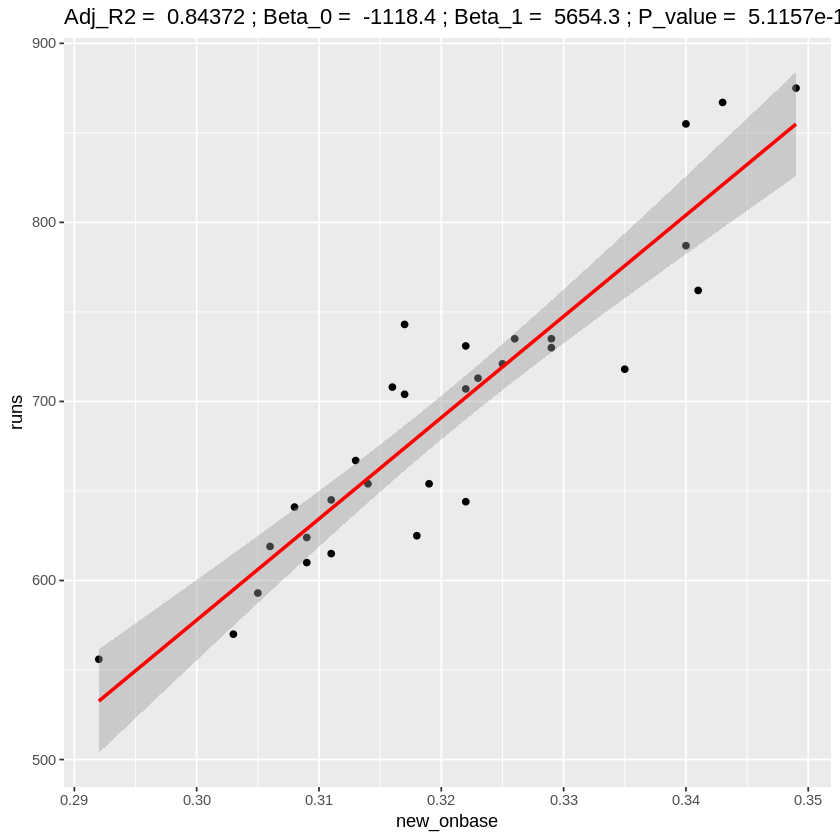

In [43]:
m9 <- lm('runs ~ new_onbase',data = mlb11)
ggplot(data= mlb11, aes(x=new_onbase, y=runs)) +
  geom_point() +
  stat_smooth(method = 'lm', col = 'red') +
  labs(title = paste("Adj_R2 = ",signif(summary(m9)$adj.r.squared, 5),
                     "; Beta_0 = ", signif(m9$coef[[1]], 5),
                     "; Beta_1 = ", signif(m9$coef[[2]], 5),
                     "; P_value = ", signif(summary(m9)$coef[2,4], 5)))

<h4>Q7 .) Check the model diagnostics for the regression model with the variable you decided was the best predictor for runs.</h4>

In [44]:
summary(m7)


Call:
lm(formula = "runs ~ new_obs", data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.456 -13.690   1.165  13.935  41.156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -686.61      68.93  -9.962 1.05e-10 ***
new_obs      1919.36      95.70  20.057  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.41 on 28 degrees of freedom
Multiple R-squared:  0.9349,	Adjusted R-squared:  0.9326 
F-statistic: 402.3 on 1 and 28 DF,  p-value: < 2.2e-16


<h1>Lab-2:Multiple linear regression</h1>

<h2>Load packages</h2>

In [48]:
install.packages("knitr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’




In [50]:
library(knitr)
library(statsr)
library(dplyr)
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



<h2>Load The data</h2>

In [51]:
data(evals)

<h2>Exploring the data</h2>

In [52]:
summary(evals$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.800   4.300   4.175   4.600   5.000 

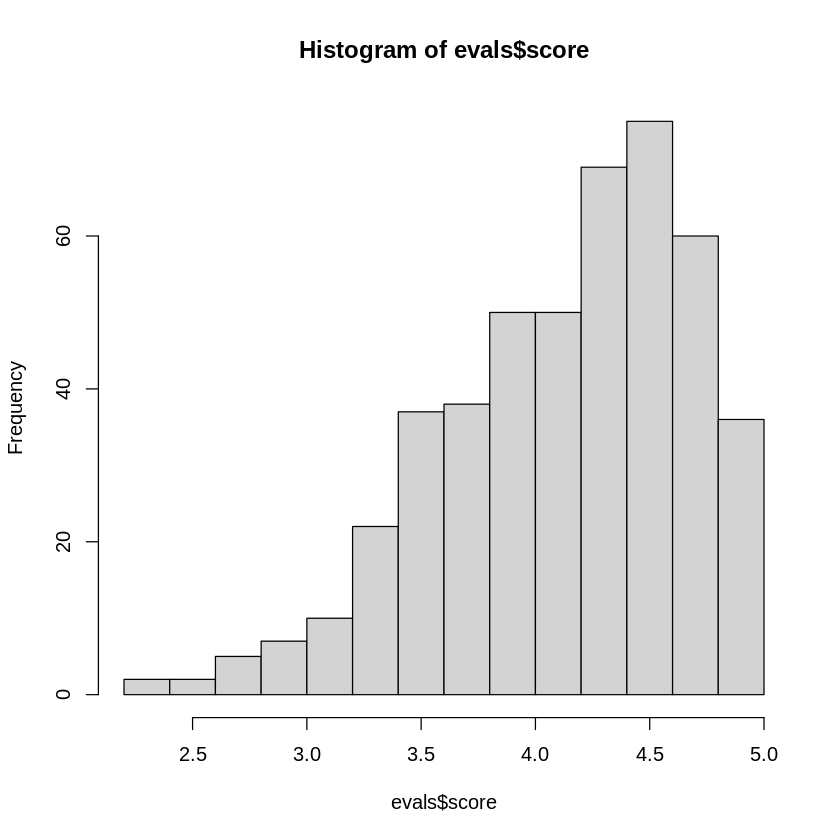

In [53]:
hist(evals$score)

<h4>Q1. )Excluding score, select two other variables and describe their relationship using an appropriate visualization (scatterplot, side-by-side boxplots, or mosaic plot).</h4>

In [54]:
require(gridExtra)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




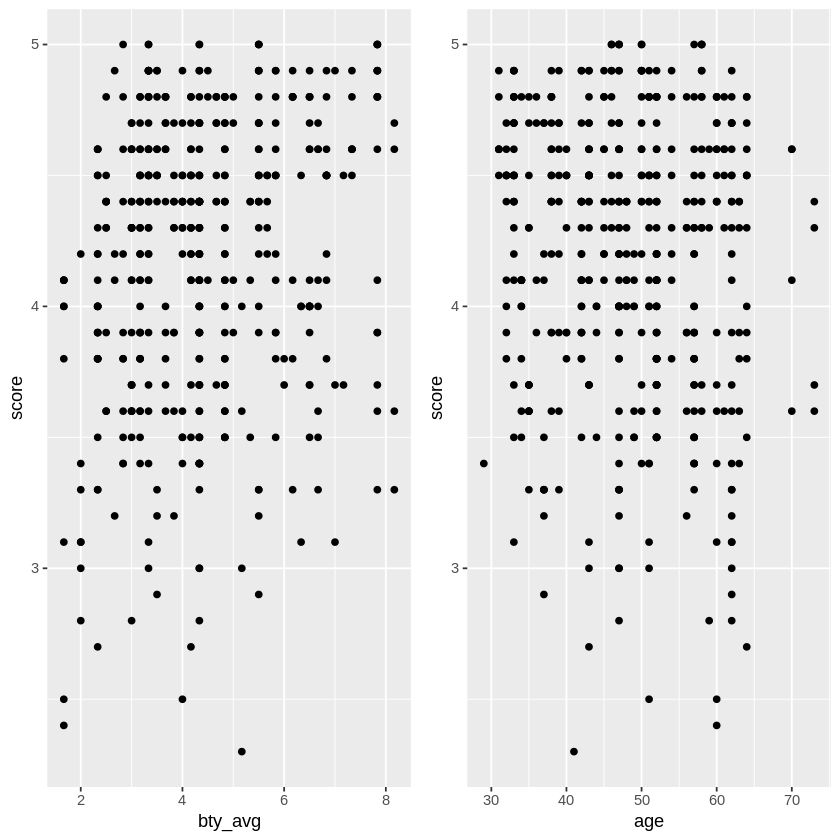

In [55]:
bty_avg_plt <- ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_point()
age_plt <- ggplot(data = evals, aes(x = age, y = score)) +
  geom_point()
grid.arrange(bty_avg_plt, age_plt, ncol = 2)

<h1>Simple linear regression</h1>

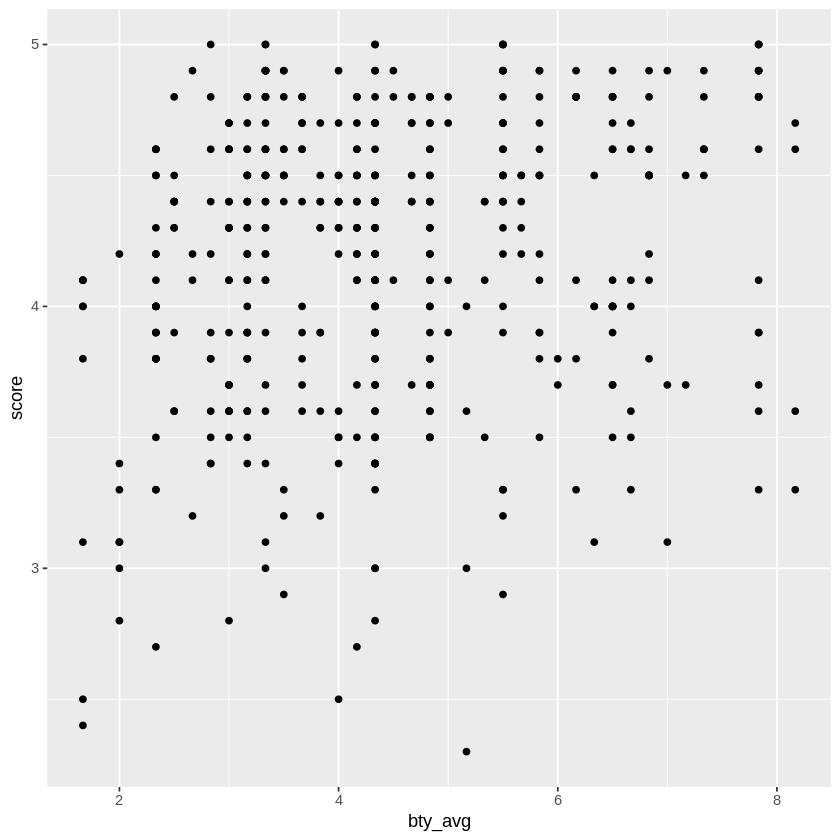

In [56]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_point()

<h4>Q2. )Replot the scatterplot, but this time replace the geom_point() layer with a geom_jitter() layer. (Use ?geom_jitter to learn more.) What was misleading about the initial scatterplot?</h4>

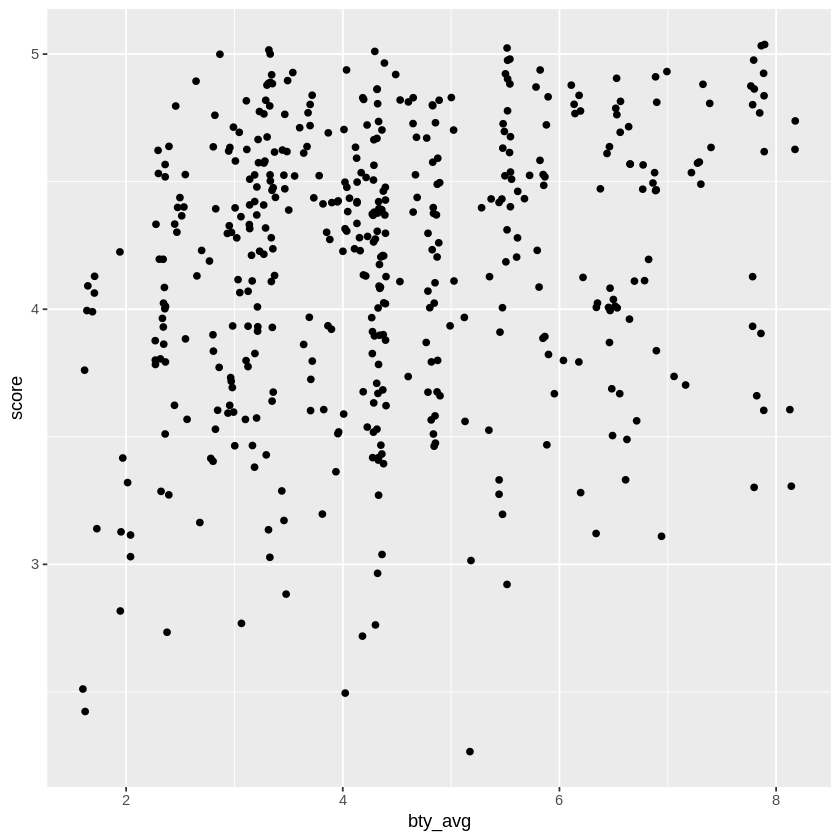

In [57]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_jitter()

`geom_smooth()` using formula = 'y ~ x'


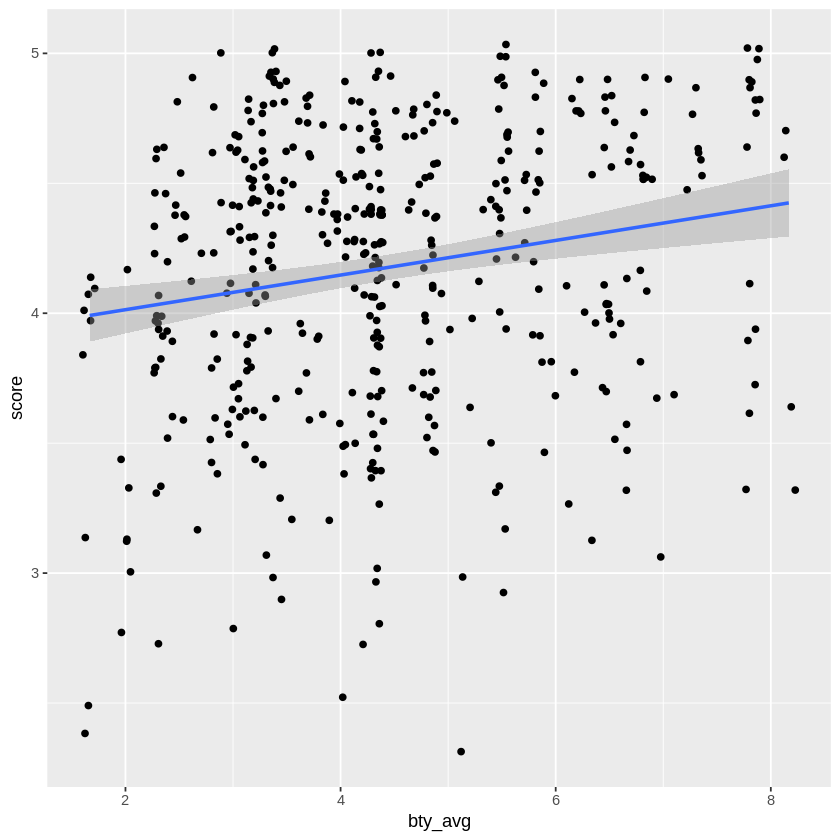

In [58]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_jitter() +
  geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'


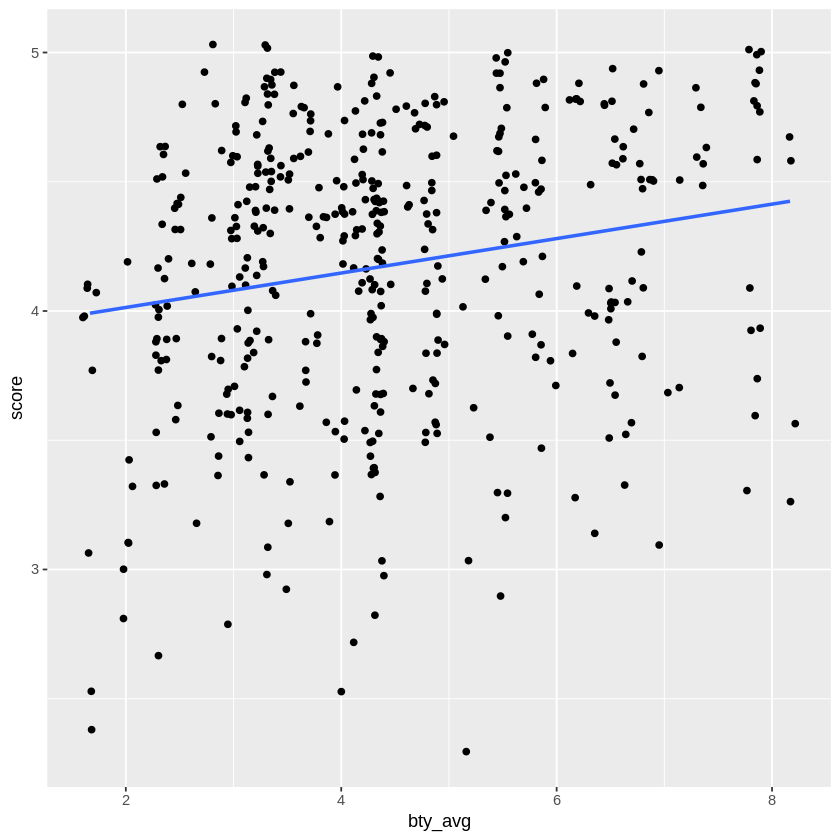

In [59]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_jitter() +
  geom_smooth(method = "lm", se = FALSE)

<h4>Q3.) Print a summary of the linear model, write out the equation, and interpret the slope.</h4>

In [60]:
bty_lm <- lm(score ~ bty_avg, data = evals)
summary(bty_lm)


Call:
lm(formula = score ~ bty_avg, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9246 -0.3690  0.1420  0.3977  0.9309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88034    0.07614   50.96  < 2e-16 ***
bty_avg      0.06664    0.01629    4.09 5.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5348 on 461 degrees of freedom
Multiple R-squared:  0.03502,	Adjusted R-squared:  0.03293 
F-statistic: 16.73 on 1 and 461 DF,  p-value: 5.083e-05


integer(0)

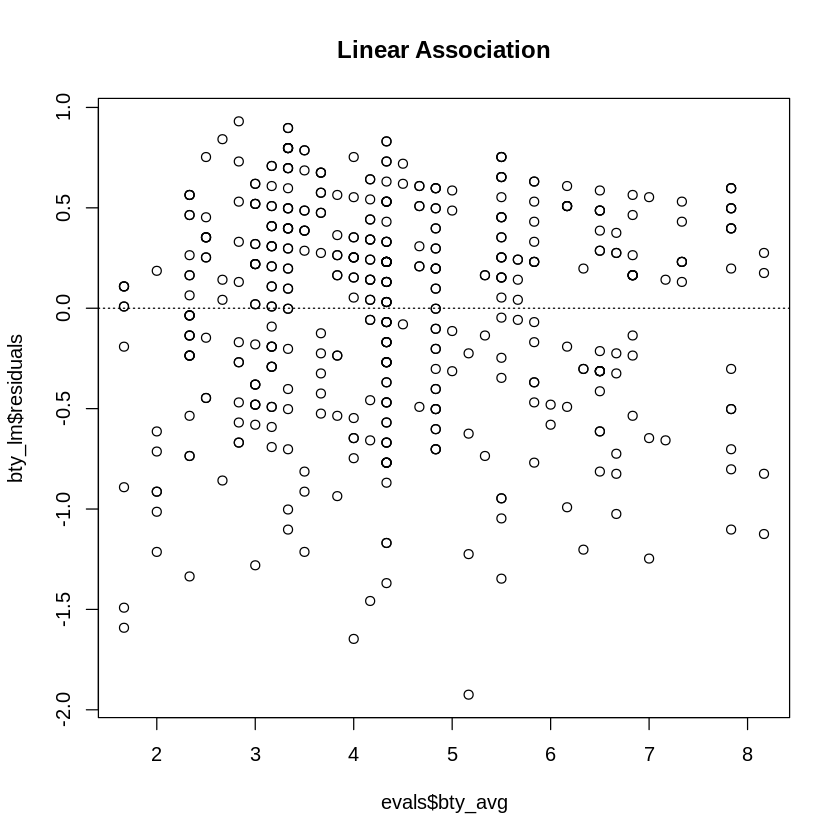

In [61]:
plot(bty_lm$residuals ~ evals$bty_avg)
  abline(0, 0, lty = 3) +
  title("Linear Association")

integer(0)

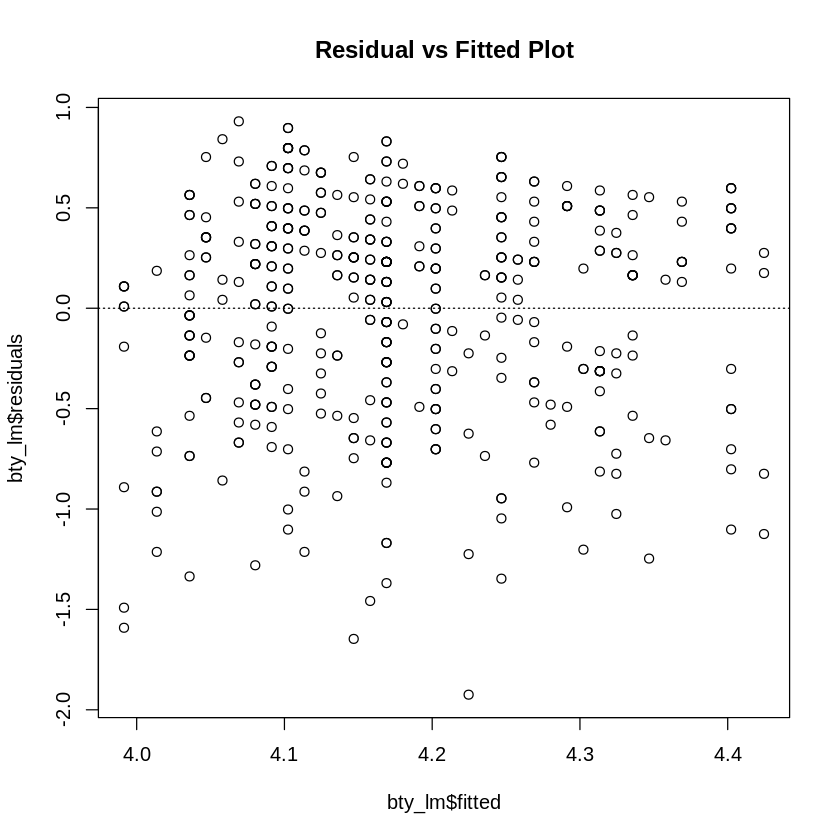

In [62]:
plot(bty_lm$residuals ~ bty_lm$fitted) +
  abline(0, 0, lty = 3) +
  title("Residual vs Fitted Plot")

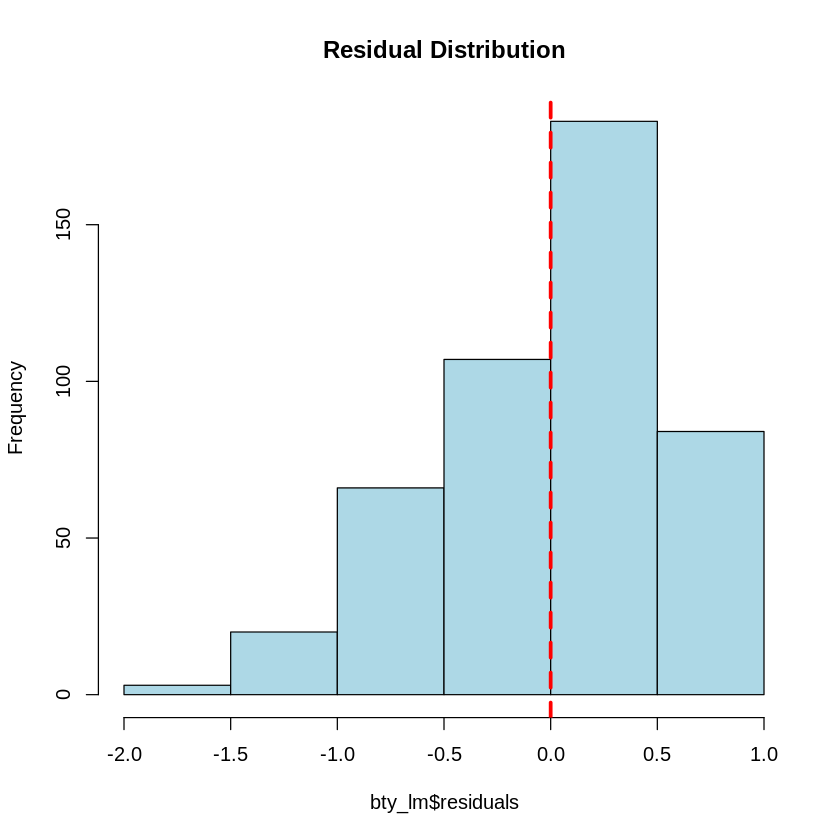

In [63]:
hist(bty_lm$residuals, col='lightblue', main="Residual Distribution")
abline(v = 0, col = 'red', lwd = 3, lty = 2)

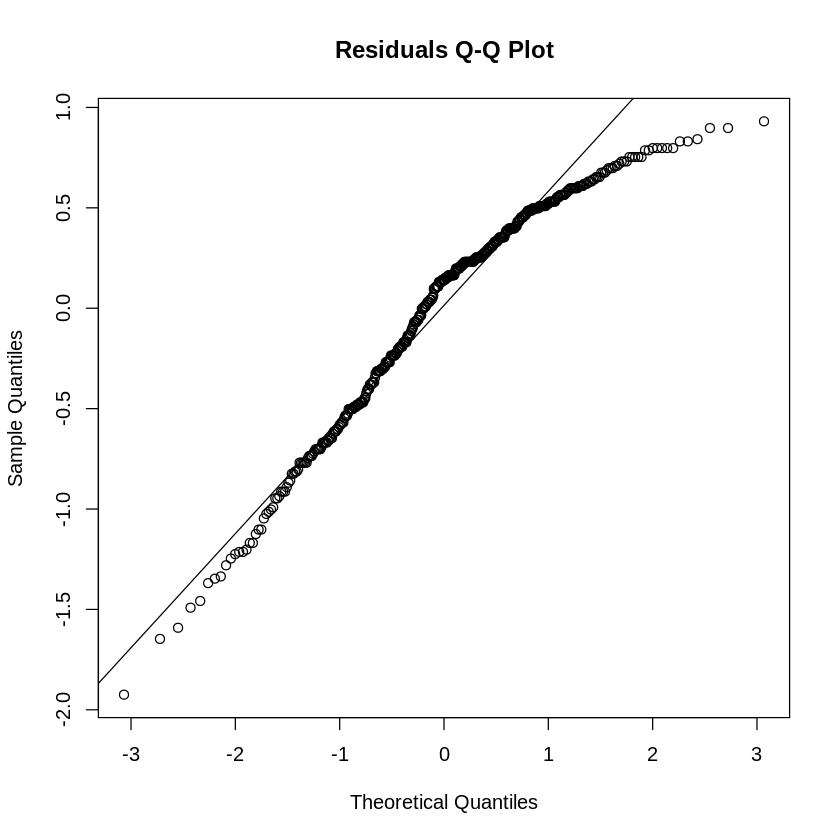

In [64]:
qqnorm(bty_lm$residuals, main = "Residuals Q-Q Plot")
qqline(bty_lm$residuals)

integer(0)

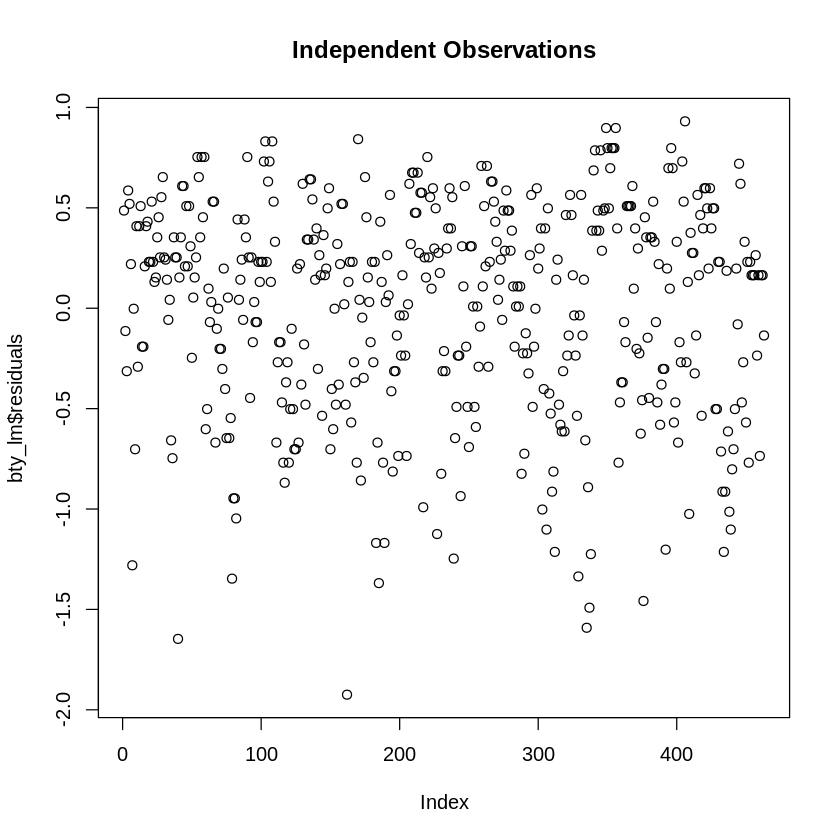

In [65]:
plot(bty_lm$residuals) +
  title("Independent Observations")

<h1>Multiple linear regression</h1>

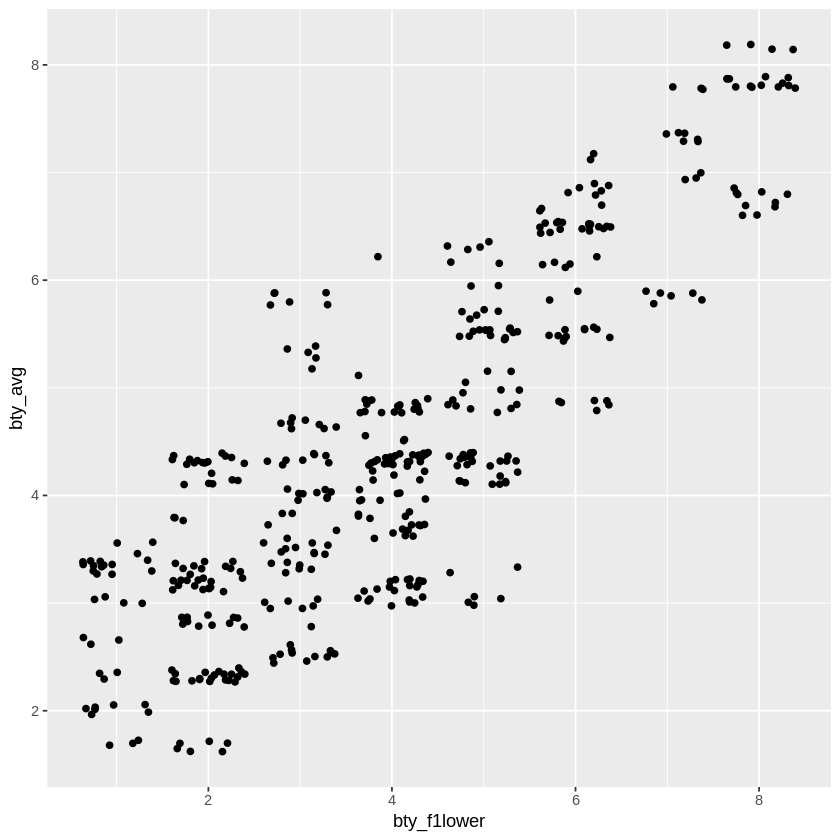

In [66]:
ggplot(data = evals, aes(x = bty_f1lower, y = bty_avg)) +
  geom_jitter()

In [67]:
evals %>%
  summarise(cor(bty_avg, bty_f1lower))

"cor(bty_avg, bty_f1lower)"
<dbl>
0.8439112


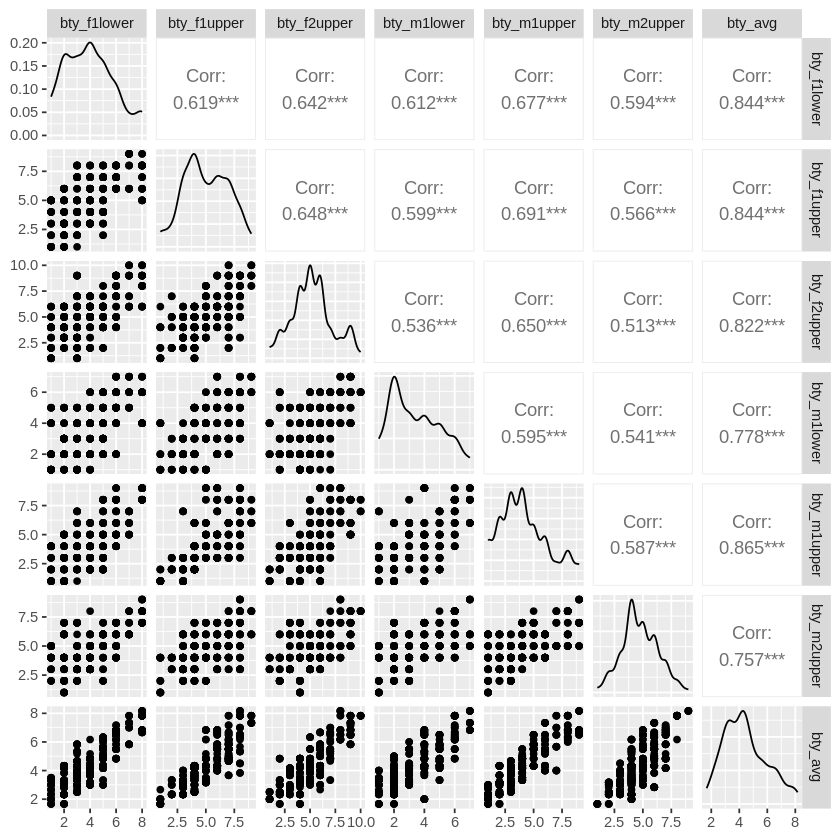

In [68]:
ggpairs(evals, columns = 13:19)

In [69]:
m_bty_gen <- lm(score ~ bty_avg + gender, data = evals)
summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + gender, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74734    0.08466  44.266  < 2e-16 ***
bty_avg      0.07416    0.01625   4.563 6.48e-06 ***
gendermale   0.17239    0.05022   3.433 0.000652 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


integer(0)

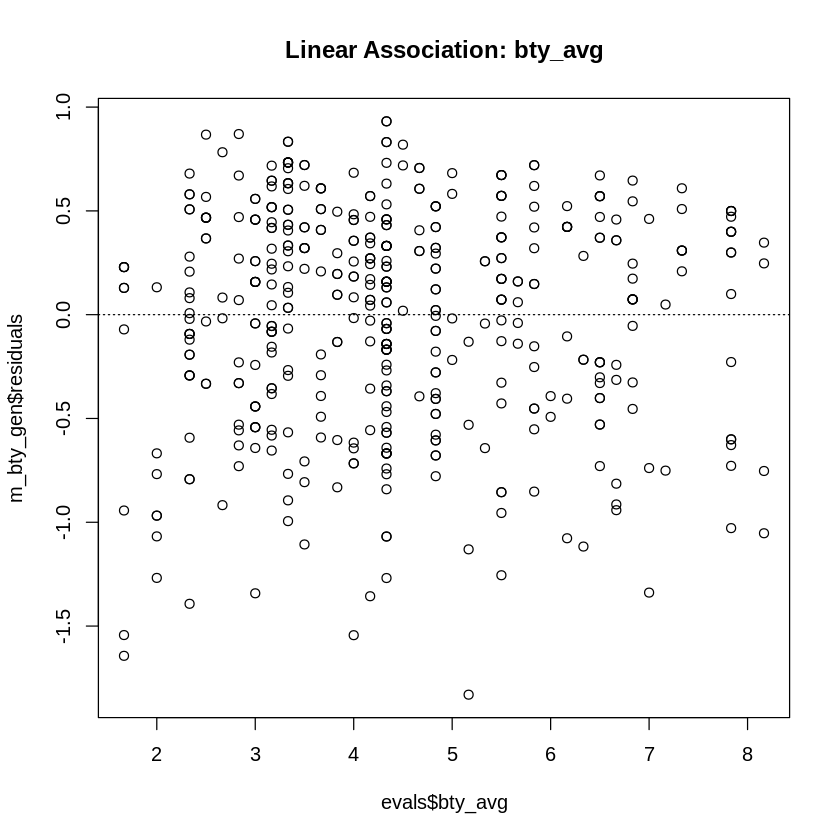

In [70]:
plot(m_bty_gen$residuals ~ evals$bty_avg)
  abline(0, 0, lty = 3) +
  title("Linear Association: bty_avg")

integer(0)

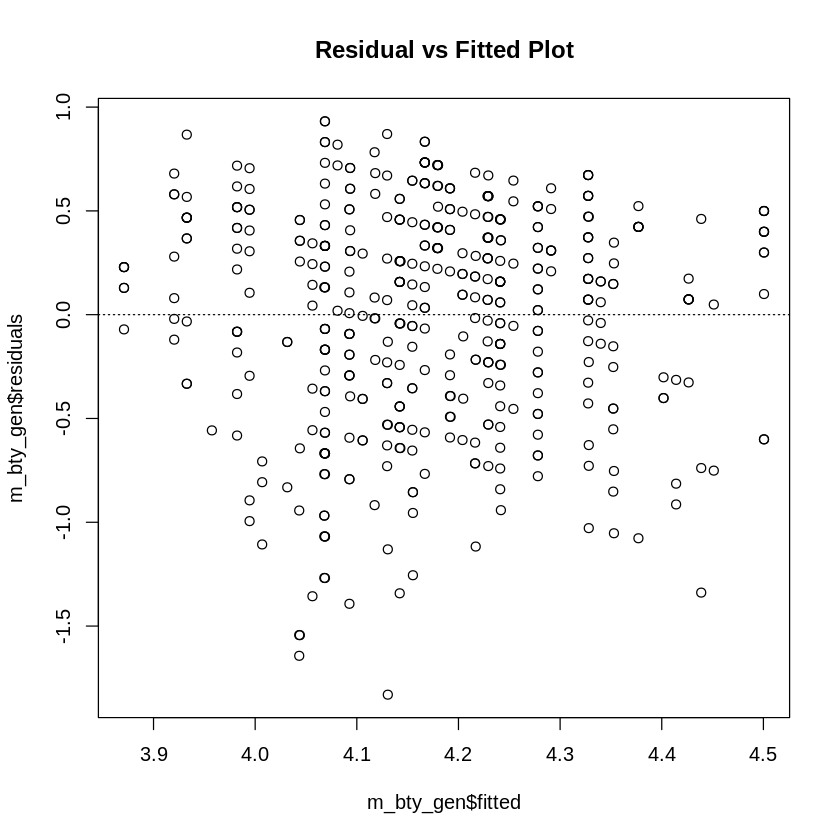

In [71]:
plot(m_bty_gen$residuals ~ m_bty_gen$fitted) +
  abline(0, 0, lty = 3) +
  title("Residual vs Fitted Plot")

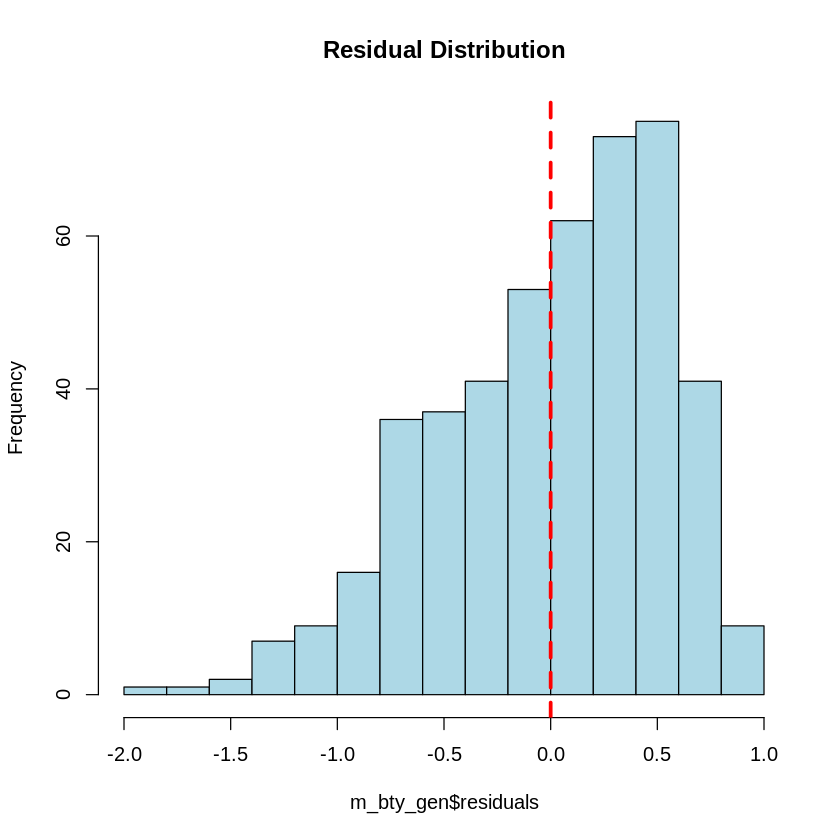

In [72]:
hist(m_bty_gen$residuals, col='lightblue', main="Residual Distribution")
abline(v = 0, col = 'red', lwd = 3, lty = 2)

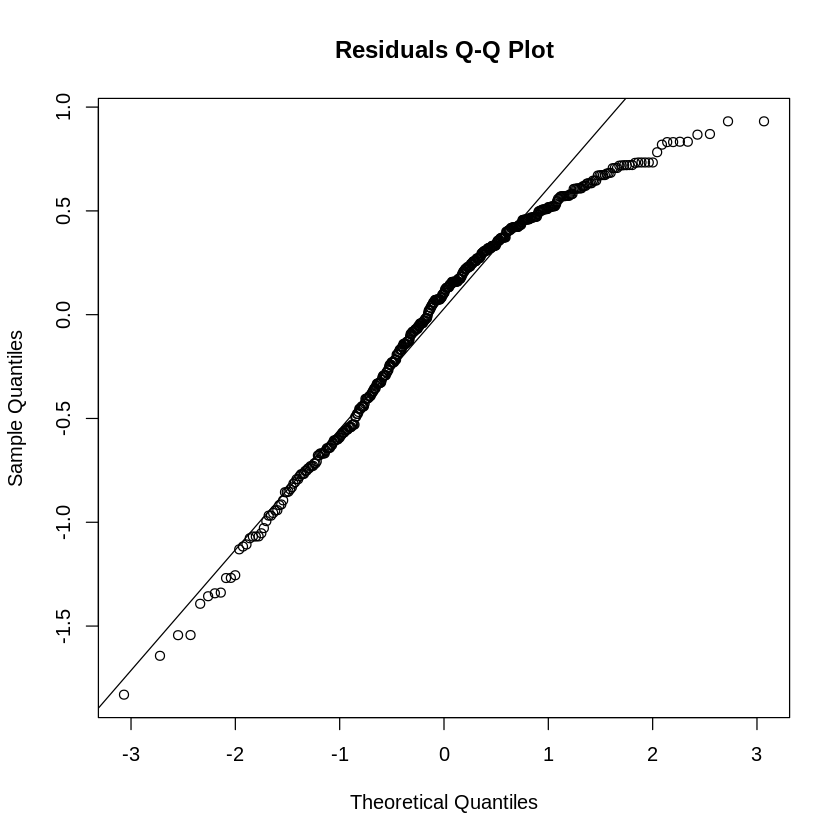

In [73]:
qqnorm(m_bty_gen$residuals, main = "Residuals Q-Q Plot")
qqline(m_bty_gen$residuals)

integer(0)

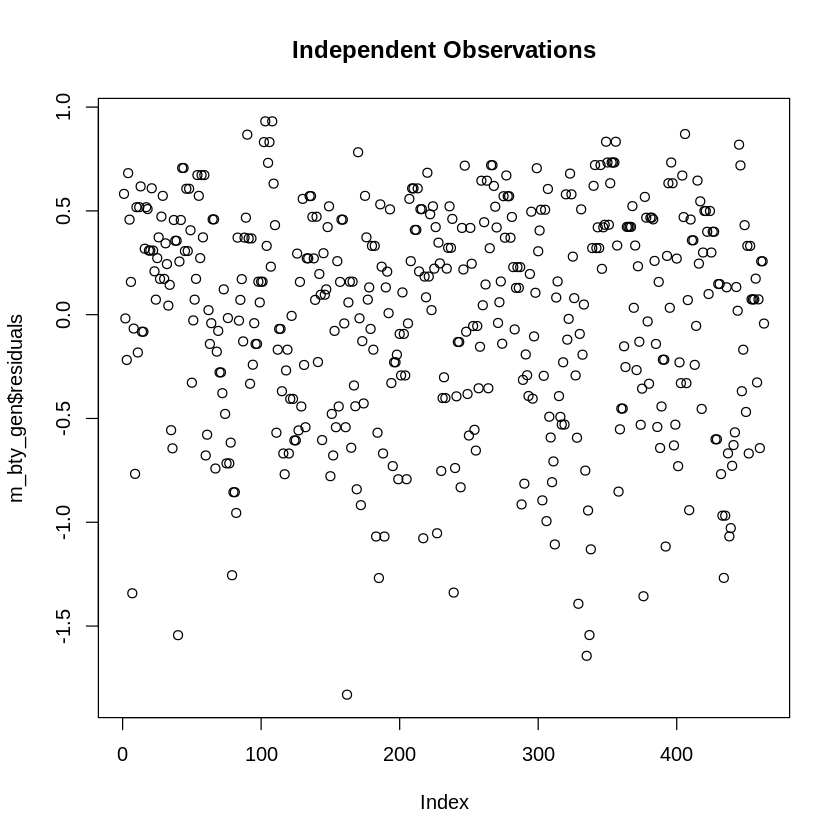

In [74]:
plot(m_bty_gen$residuals) +
  title("Independent Observations")

<h4>Q4.)Print a summary of the multiple linear regression model. Is bty_avg still a significant predictor of score? Has the addition of gender to the model changed the parameter estimate for bty_avg?</h4>

In [75]:
summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + gender, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74734    0.08466  44.266  < 2e-16 ***
bty_avg      0.07416    0.01625   4.563 6.48e-06 ***
gendermale   0.17239    0.05022   3.433 0.000652 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


In [76]:
evals2 <- evals
evals2$gender <- relevel(evals2$gender, ref = 'male')
m_bty_gen2 <- lm(score ~ bty_avg + gender, data = evals2)
summary(m_bty_gen2)


Call:
lm(formula = score ~ bty_avg + gender, data = evals2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.91973    0.07614  51.482  < 2e-16 ***
bty_avg       0.07416    0.01625   4.563 6.48e-06 ***
genderfemale -0.17239    0.05022  -3.433 0.000652 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


<h4>Q5.)Create a new model called m_bty_rank with gender removed and rank added in. How does R appear to handle categorical variables that have more than two levels? Note that the rank variable has three levels: teaching, tenure track, tenured.</h4>

In [77]:
m_bty_rank <- lm(score ~ bty_avg + rank, data = evals)
summary(m_bty_rank)


Call:
lm(formula = score ~ bty_avg + rank, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8713 -0.3642  0.1489  0.4103  0.9525 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.98155    0.09078  43.860  < 2e-16 ***
bty_avg           0.06783    0.01655   4.098 4.92e-05 ***
ranktenure track -0.16070    0.07395  -2.173   0.0303 *  
ranktenured      -0.12623    0.06266  -2.014   0.0445 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5328 on 459 degrees of freedom
Multiple R-squared:  0.04652,	Adjusted R-squared:  0.04029 
F-statistic: 7.465 on 3 and 459 DF,  p-value: 6.88e-05


<h1>Prediction</h1>

In [78]:
newprof <- data.frame(gender = "male", bty_avg = 3)

In [79]:
predict(m_bty_gen, newprof)

1 
4.142194

In [80]:
predict(m_bty_gen, newprof, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,4.142194,3.100559,5.183829


<h1>The search for the best model</h1>

In [81]:
m_full <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg
             + pic_outfit + pic_color, data = evals)
summary(m_full)


Call:
lm(formula = score ~ rank + ethnicity + gender + language + age + 
    cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + 
    bty_avg + pic_outfit + pic_color, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77397 -0.32432  0.09067  0.35183  0.95036 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.0952141  0.2905277  14.096  < 2e-16 ***
ranktenure track      -0.1475932  0.0820671  -1.798  0.07278 .  
ranktenured           -0.0973378  0.0663296  -1.467  0.14295    
ethnicitynot minority  0.1234929  0.0786273   1.571  0.11698    
gendermale             0.2109481  0.0518230   4.071 5.54e-05 ***
languagenon-english   -0.2298112  0.1113754  -2.063  0.03965 *  
age                   -0.0090072  0.0031359  -2.872  0.00427 ** 
cls_perc_eval          0.0053272  0.0015393   3.461  0.00059 ***
cls_students           0.0004546  0.0003774   1.205  0.22896    
cls_levelupper         0.060514

<h4>Q6.)Drop the variable with the highest p-value and re-fit the model. Did the coefficients and significance of the other explanatory variables change? (One of the things that makes multiple regression interesting is that coefficient estimates depend on the other variables that are included in the model.) If not, what does this say about whether or not the dropped variable was collinear with the other explanatory variables?</h4>

In [82]:
m_dropped <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval
             + cls_students + cls_level + cls_credits + bty_avg
             + pic_outfit + pic_color, data = evals)
summary(m_dropped)


Call:
lm(formula = score ~ rank + ethnicity + gender + language + age + 
    cls_perc_eval + cls_students + cls_level + cls_credits + 
    bty_avg + pic_outfit + pic_color, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7836 -0.3257  0.0859  0.3513  0.9551 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.0872523  0.2888562  14.150  < 2e-16 ***
ranktenure track      -0.1476746  0.0819824  -1.801 0.072327 .  
ranktenured           -0.0973829  0.0662614  -1.470 0.142349    
ethnicitynot minority  0.1274458  0.0772887   1.649 0.099856 .  
gendermale             0.2101231  0.0516873   4.065 5.66e-05 ***
languagenon-english   -0.2282894  0.1111305  -2.054 0.040530 *  
age                   -0.0089992  0.0031326  -2.873 0.004262 ** 
cls_perc_eval          0.0052888  0.0015317   3.453 0.000607 ***
cls_students           0.0004687  0.0003737   1.254 0.210384    
cls_levelupper         0.0606374  0.0575010   1.055 0

In [83]:
m1 <- lm(score ~ ethnicity + gender + language + age + cls_perc_eval
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg, data = evals)
summary(m1)$adj.r.squared

[1] 0.1417823

In [84]:
m2 = lm(score ~ rank + gender + language + age + cls_perc_eval +
    cls_students + cls_level + cls_profs + cls_credits + bty_avg, data = evals)
summary(m2)$adj.r.squared

[1] 0.1320486

<h4>Q7.)Repeat this process until you have tried removing each variable from the full model at a time, and determine removal of which variable yields the highest improvement in the adjusted R2
.</h4>

In [85]:
m3 = lm(score ~ ethnicity + rank + gender + language + age + cls_perc_eval +
    cls_students + cls_level + cls_profs + cls_credits + rank, data = evals)
summary(m3)$adj.r.squared

[1] 0.1174189

In [86]:
m4 = lm(score ~ ethnicity + rank + gender + language + age + cls_perc_eval +
    cls_students + cls_level + bty_avg + cls_credits + rank, data = evals)
summary(m4)$adj.r.squared

[1] 0.1430683

In [87]:
m5 = lm(score ~ ethnicity + rank + gender + language + age + cls_perc_eval +
    cls_profs + cls_level + bty_avg + cls_credits + rank, data = evals)
summary(m5)$adj.r.squared

[1] 0.1401804

In [88]:
m6 <- lm(score ~ ethnicity + gender + language + age + cls_perc_eval
             + cls_students + cls_level + cls_profs + cls_credits + bty_avg, data = evals)
summary(m6)$adj.r.squared

[1] 0.1417823